In [110]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/star-type-classification/Stars.csv


In [111]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style = "darkgrid")

In [112]:
data = pd.read_csv('/kaggle/input/star-type-classification/Stars.csv')
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [114]:
#Missing Value Analysis
data.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

Text(0.5, 1.0, 'Star Color Analysis')

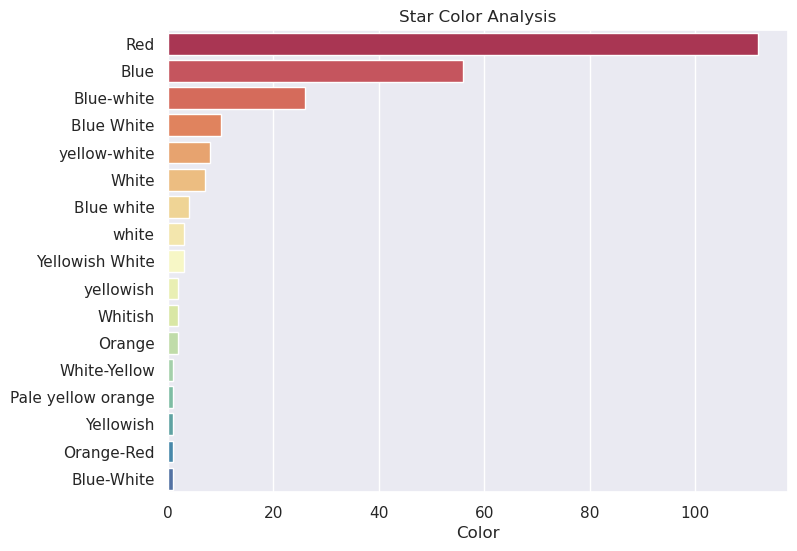

In [115]:
# Star Colour Analysis:

a= pd.DataFrame(data['Color'].value_counts())
plt.figure(figsize=(8,6))
sns.barplot(data= a, x='Color',y= a.index, palette= 'Spectral')
plt.title("Star Color Analysis")

Text(0.5, 1.0, 'Star Spectral Class Analysis')

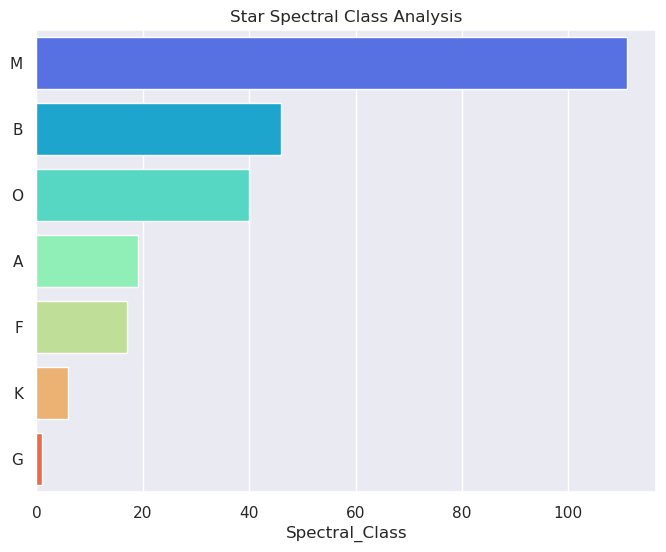

In [116]:
# Star Spectral Class Analysis:

a= pd.DataFrame(data['Spectral_Class'].value_counts())
plt.figure(figsize=(8,6))
sns.barplot(data=a, x='Spectral_Class',y= a.index, palette= 'rainbow')
plt.title("Star Spectral Class Analysis")

Text(0.5, 1.0, 'Percentage Distribution of Star Type')

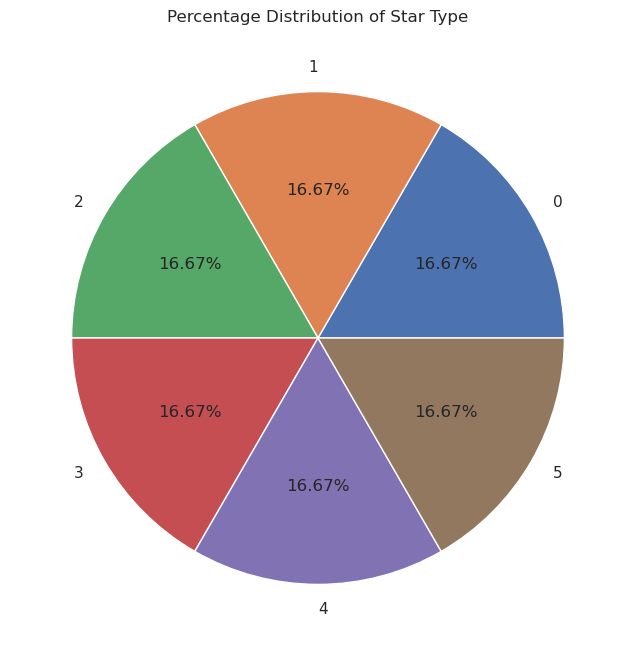

In [117]:
# Star Type Analysis:

a =pd.DataFrame(data['Type'].value_counts())
plt.figure(figsize=(10,8))
plt.pie(data=a, x='Type',labels=a.index,autopct='%1.2f%%')
plt.title("Percentage Distribution of Star Type")

In [118]:
print(data.columns)

Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type'], dtype='object')


In [119]:
# Correlation Analysis:

matrix= data.corr()
print(matrix)

             Temperature         L         R       A_M      Type
Temperature     1.000000  0.393404  0.064216 -0.420261  0.411129
L               0.393404  1.000000  0.526516 -0.692619  0.676845
R               0.064216  0.526516  1.000000 -0.608728  0.660975
A_M            -0.420261 -0.692619 -0.608728  1.000000 -0.955276
Type            0.411129  0.676845  0.660975 -0.955276  1.000000


/tmp/ipykernel_32/2534768063.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix= data.corr()


In [120]:
#Creates an array of zeroes with shape same as matrix
mask = np.zeros_like(matrix, dtype=float)
print(mask,"\n")
print(np.triu_indices_from(mask),"\n")
mask[np.triu_indices_from(mask)]= True
print(mask)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]] 

(array([0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4]), array([0, 1, 2, 3, 4, 1, 2, 3, 4, 2, 3, 4, 3, 4, 4])) 

[[1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1.]]


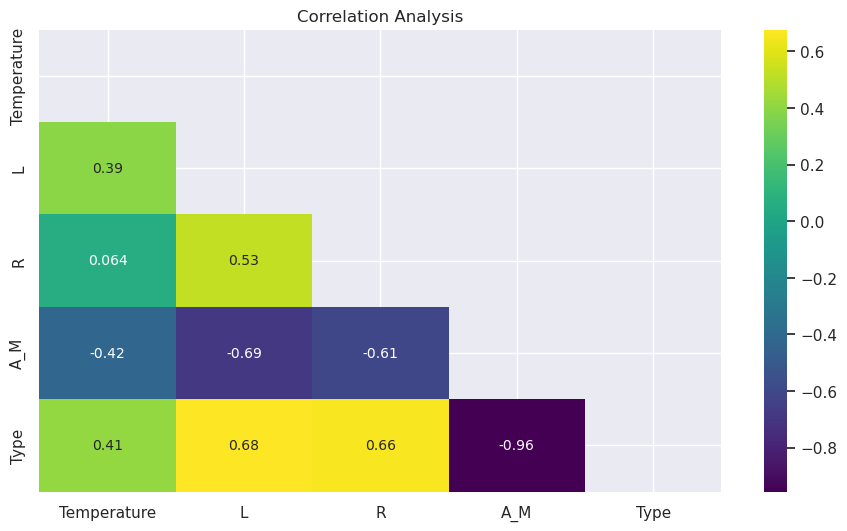

In [121]:
plt.figure(figsize=(11,6))
sns.heatmap(matrix,annot=True,cmap='viridis',annot_kws = {'size': 10},mask=mask)
plt.title("Correlation Analysis")
plt.show()

In [122]:
from sklearn import preprocessing
# label_encoder 
label_encoder = preprocessing.LabelEncoder()

In [123]:
data['Color_Label']= label_encoder.fit_transform(data['Color'])
data['Spectral_Class_Label']= label_encoder.fit_transform(data['Spectral_Class'])
data.head(-10)

,Temperature,L,R,A_M,Color,Spectral_Class,Type,Color_Label,Spectral_Class_Label
0,3068,0.002400,0.1700,16.120,Red,M,0,8,5
1,3042,0.000500,0.1542,16.600,Red,M,0,8,5
2,2600,0.000300,0.1020,18.700,Red,M,0,8,5
3,2800,0.000200,0.1600,16.650,Red,M,0,8,5
4,1939,0.000138,0.1030,20.060,Red,M,0,8,5
...,...,...,...,...,...,...,...,...,...
225,18734,224780.000000,46.0000,-7.450,Blue,O,4,0,6
226,9892,593900.000000,80.0000,-7.262,Blue,O,4,0,6
227,10930,783930.000000,25.0000,-6.224,Blue,O,4,0,6
228,23095,347820.000000,86.0000,-5.905,Blue,O,4,0,6


In [124]:
color_label_df=data[['Color','Color_Label']]
color_label_df=color_label_df.drop_duplicates().reset_index(drop=True).sort_values(by='Color_Label')
print(color_label_df)

                 Color  Color_Label
6                 Blue            0
1           Blue White            1
4           Blue white            2
16          Blue-White            3
7           Blue-white            4
10              Orange            5
15          Orange-Red            6
5   Pale yellow orange            7
0                  Red            8
2                White            9
11        White-Yellow           10
8              Whitish           11
14           Yellowish           12
3      Yellowish White           13
12               white           14
9         yellow-white           15
13           yellowish           16


In [125]:
spectral_label_df=data[['Spectral_Class','Spectral_Class_Label']]
spectral_label_df=spectral_label_df.drop_duplicates().reset_index(drop=True).sort_values(by='Spectral_Class_Label')
print(spectral_label_df)

  Spectral_Class  Spectral_Class_Label
2              A                     0
1              B                     1
3              F                     2
6              G                     3
5              K                     4
0              M                     5
4              O                     6


In [126]:
#Splitting Dataset
y= data["Spectral_Class_Label"].values
X = data.drop(labels=['Spectral_Class_Label','Color','Spectral_Class'], axis=1).values
# X = data.drop(labels=['Spectral_Class_Label','Color','Spectral_Class'], axis=1)
print(X)

     Temperature              L          R    A_M  Type  Color_Label
0           3068       0.002400     0.1700  16.12     0            8
1           3042       0.000500     0.1542  16.60     0            8
2           2600       0.000300     0.1020  18.70     0            8
3           2800       0.000200     0.1600  16.65     0            8
4           1939       0.000138     0.1030  20.06     0            8
..           ...            ...        ...    ...   ...          ...
235        38940  374830.000000  1356.0000  -9.93     5            0
236        30839  834042.000000  1194.0000 -10.63     5            0
237         8829  537493.000000  1423.0000 -10.73     5            9
238         9235  404940.000000  1112.0000 -11.23     5            9
239        37882  294903.000000  1783.0000  -7.80     5            0

[240 rows x 6 columns]


In [159]:
print(data['Spectral_Class'].value_counts(),"\n",data['Color'].value_counts())

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral_Class, dtype: int64 
 Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
white                   3
Yellowish White         3
yellowish               2
Whitish                 2
Orange                  2
White-Yellow            1
Pale yellow orange      1
Yellowish               1
Orange-Red              1
Blue-White              1
Name: Color, dtype: int64


In [160]:
from sklearn.preprocessing import StandardScaler,RobustScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [161]:
print(len(X))

240


In [162]:
X.mean(axis = 0)

array([-3.70074342e-18,  0.00000000e+00, -1.57281595e-17, -2.22044605e-17,
        1.48029737e-17, -7.40148683e-18])

In [163]:
# Implementation of PCA:

from sklearn.decomposition import PCA
pca = PCA()
X = pca.fit_transform(X)
print(X)

[[-0.09899961  0.90804629  0.3645574   0.95964757 -0.00475504 -1.35119984]
 [-0.15046133  0.94633754  0.41825103  0.85047766  0.01463139 -1.27233798]
 [-0.38088297  1.09134662  0.67063105  0.34998735  0.08278836 -0.95664194]
 ...
 [ 1.27035023 -0.6799214   2.41922376  1.07737166  0.12512864  0.99071036]
 [ 1.45459867 -0.77096751  1.32383184  0.66318515 -0.19034355  0.81632376]
 [ 0.38276616  0.04089296 -0.0174493   1.18365456  4.28842251  1.79532825]]


In [164]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [174]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
X_2 = pca2.fit_transform(X)
# print(X_2)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.2, random_state=5)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy: ' , accuracy_score(y_test, y_pred))

Accuracy:  0.6458333333333334


##### from sklearn.decomposition import PCA
pca2 = PCA(n_components=4)
X_2 = pca2.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.2, random_state=5)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy: ' , accuracy_score(y_test, y_pred))

In [173]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=6)
X_2 = pca2.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.2, random_state=5)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy: ' , accuracy_score(y_test, y_pred))

Accuracy:  0.7291666666666666
